In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 세팅
plt.style.use('seaborn')
sns.set(font_scale=2.5)

# 결측값을 보여주는 라이브러리
import missingno as msno

# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline

/kaggle/input/d/rahulsah06/titanic/train.csv
/kaggle/input/d/rahulsah06/titanic/test.csv
/kaggle/input/d/rahulsah06/titanic/gender_submission.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [40]:
# 데이터 정리 -> NULL 값들 확인 -> EDA: 각각의 특성들 분석 
# -> feature engineering -> 모델 생성 -> 모델 학습 및 생성 -> 모델 평가

In [41]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [42]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
# 각 column의 간단한 통계적 분석\
# 총 인원 수가 891명인데 Age는 714명으로 count됨.
# -> Age column에 missing value가 있다
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
df_train.shape

(891, 12)

In [45]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [46]:
# 각 column의 NaN 값들 비율 확인
for col in df_train.columns:
    # {:>10} : 10자리 표현. 오른쪽 정렬
    # {:.2f} : 소수점 2자리까지 표현
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [47]:
# 각 column의 NaN 값들 비율 확인
for col in df_test.columns:
    # {:>10} : 10자리 표현. 오른쪽 정렬
    # {:.2f} : 소수점 2자리까지 표현 
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<AxesSubplot:>

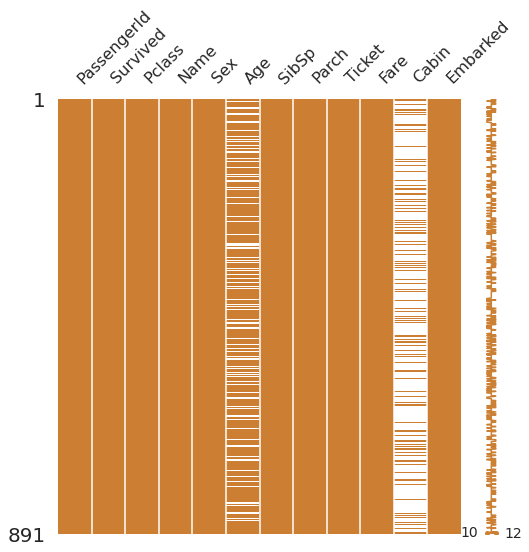

In [48]:
# iloc: index location. 내가 원하는 행과 열을 가져올 수 있음
# 빈칸이 NULL값. 어느 위치에 NULL 데이터가 존재하는지
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

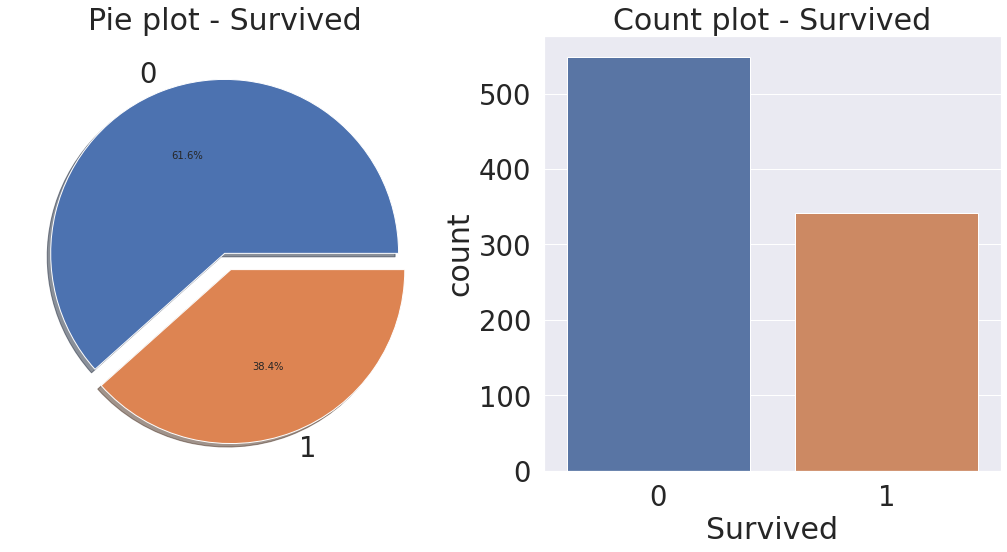

In [49]:
# target label 확인
# target label이 얼마나 balance 있게 분포되어 있는가 
# target label이 어떤 distribution을 갖는지 반드시 확인을 해야 함.

# 그래프를 그리기 위한 도화지를 준비하는 과정
# subplots()를 통해 도화지에 구획을 나눔. 아래의 예는 1행 2열로 구획을 나눔 + figsize는 도화지 전체의 크기
# f는 전체 도화지를 지칭하며 ax는 각각의 구획을 지칭. 리스트 형태이며 인덱스로 접근 가능 ex) ax[0], ax[1]
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# value_counts(): 각 레이블의 개수를 반환. type은 Series -> plot을 가지고 있음 (plt와의 호환성)
# pie(): plot을 파이 그래프로 만듦
# explode: 각 부채꼴이 중심에서 벗어나는 정도. 아래는 부채꼴이 2개니까 2개의 요소를 가지고 있는 리스트
# autopct: 부채꼴 안에 표시될 숫자의 형식
# ax: 파이 그래프를 그릴 구획 지정
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

# seaborn의 count plot 생성
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

# target label이 balance하게 분포하여 있다.

# EDA

In [50]:
# EDA: Exploratory Data Analysis
# feature들 간의 상관관계, 어떤 feature가 중요한지, feature들의 insight를 얻는 중요한 부분
# 그림을 해석하는 능력을 기르자.
# 내가 원하는 주장을 할 수 있는 그림을 그리자. 

## 2.1 Pclass

In [51]:
# Pclass에 따른 생존율의 변화
# 각 Pclass에 해당되는 사람들: Pclass와 Survived column만 가져와서 Pclass로 묶음 -> count()
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [52]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean() # 생존율

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [53]:
# 각 Pclass에 해당되는 사람들 중 생존한 사람들 -> sum()
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [54]:
# crosstab()을 사용하여 Pclass와 Survived column을 합친 표를 생성. margins=: All의 여부
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

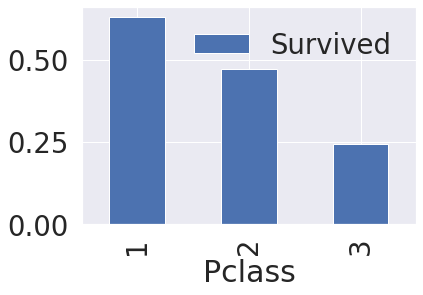

In [55]:
# 각 클래스별로 생존율 확인
# Pclass가 높을수록 생존율이 높음
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

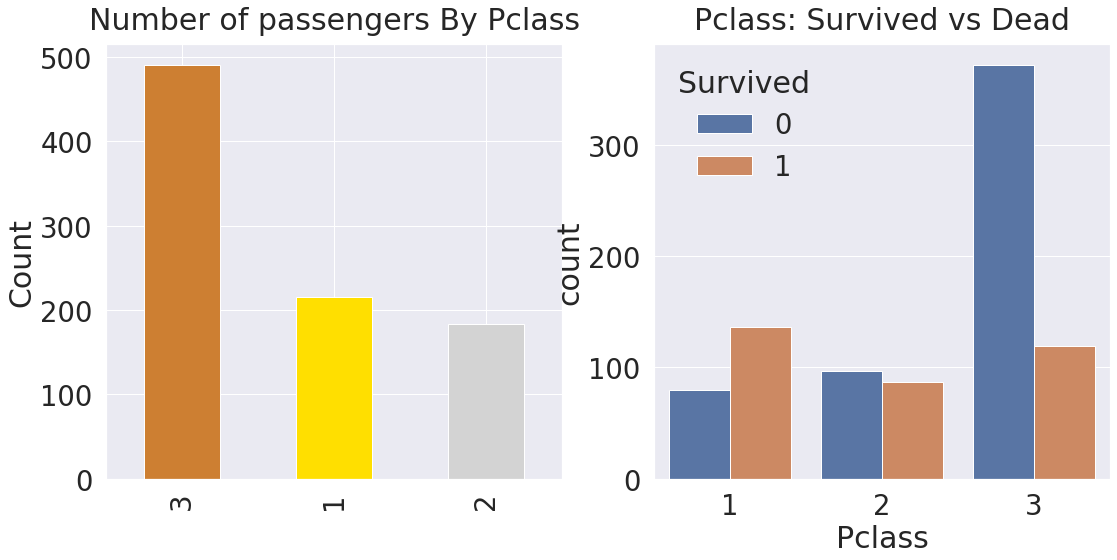

In [56]:
y_position = 1.02
f,ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

# => Pclass가 높을수록 생존 확률이 높다

## 2.2 Sex

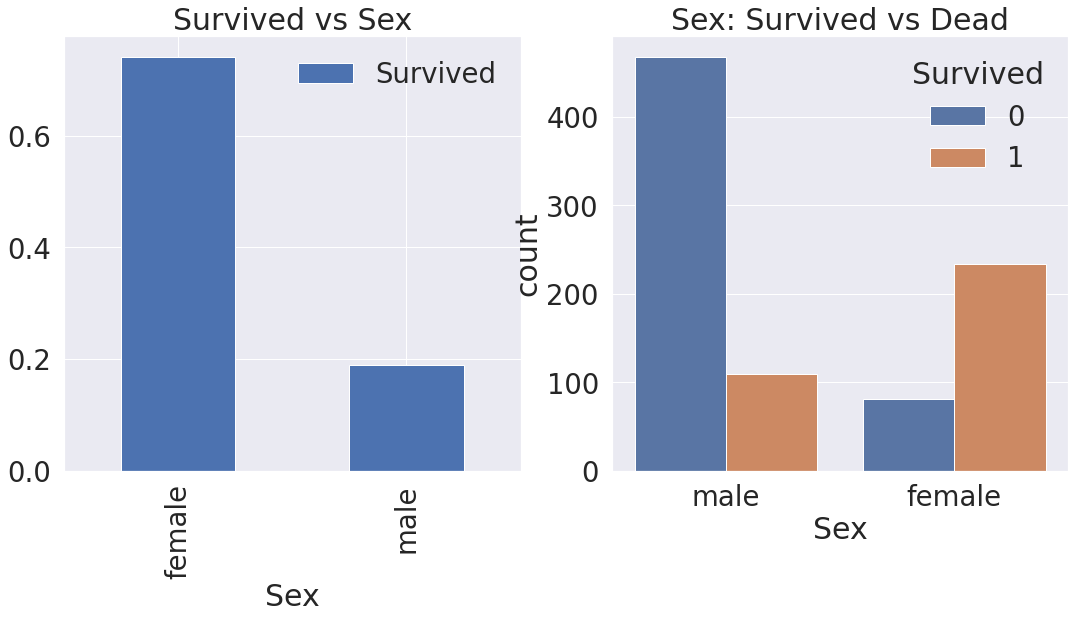

In [63]:
# 성별에 따른 생존율 변화

f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

# 여성의 생존 확률이 현저히 높음

In [65]:
# sex와 survived에 대해 크로스 테이블 생성
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.2 Both Sex and Pclass 

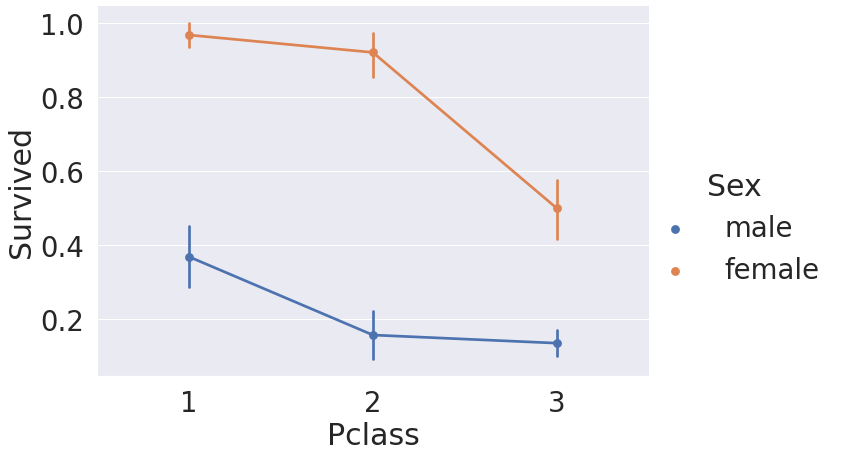

In [67]:
# sex와 pclass를 모두 고려한 생존율 그래프 생성 -> factorplot 이용
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

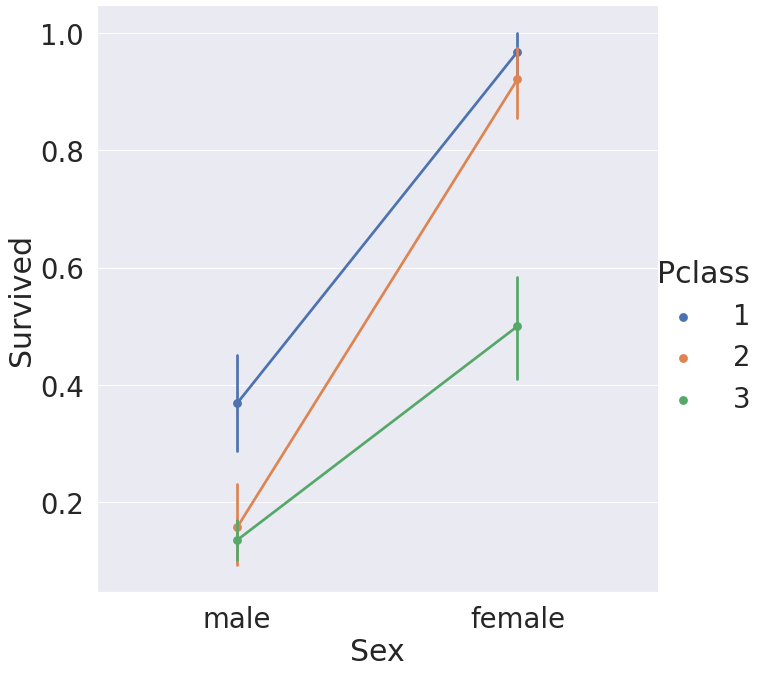

In [69]:
# 클래스가 높을수록 생존율이 높아짐. 클래스에 상관 없이 여성은 생존율이 높음
# 그래프의 세로 막대: 에러바
sns.factorplot(x='Sex', y='Survived', hue='Pclass', data=df_train, saturation=.5, size=9, aspect=1)